# Clustering all the National Anthems into different clusters

### Installing all the libraries

In [ ]:
# Installing geopandas
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importing basic libraries for data processing
import numpy  as np
import pandas as pd
import geopandas as gpd
import json

In [ ]:
# Importing libraries for Visualization and Analysis
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score
from wordcloud import WordCloud

In [ ]:
# Importing the Natural Language Toolkit library
import nltk

In [ ]:
# Downloading the punkt module from the nltk library 
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Downloading the stopwords module from the nltk library 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Importing libraries for K-Means
from sklearn import cluster
from sklearn_extra.cluster import KMedoids

In [ ]:
# Importing libraries for stopwords module and printing the same
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# Installing unidecode
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Reading the data file and displaying it
data = pd.read_csv('anthems.csv', encoding='utf-8')
data

,Country,Alpha-2,Alpha-3,Continent,Anthem
0,Albania,AL,ALB,Europe,"Around our flag we stand united, With one wish..."
1,Armenia,AM,ARM,Europe,"Our Fatherland, free, independent, That has fo..."
2,Austria,AT,AUT,Europe,"Land of mountains, land by the river, Land of ..."
3,Azerbaijan,AZ,AZE,Europe,"Azerbaijan, Azerbaijan! The glorious Fatherlan..."
4,Belarus,BY,BLR,Europe,"We, Belarusians, are peaceful people, Wholehea..."
...,...,...,...,...,...
185,Tunisia,TN,TUN,Africa,O defenders of the Homeland! Rally around to t...
186,Uganda,UG,UGA,Africa,"Oh Uganda! May God uphold Thee, We lay our fut..."
187,Western Sahara,EH,ESH,Africa,"O sons of the Sahara! In the battlefield, you ..."
188,Zambia,ZM,ZMB,Africa,"Stand and sing of Zambia, proud and free, Land..."


This dataset contains the translated lyrics of all the National Anthems of 190 countries, with the 3 letter and 2 letter abbrebiation of the countries and the continent in which the country is located.

In [ ]:
data.head(15)

,Country,Alpha-2,Alpha-3,Continent,Anthem
0,Albania,AL,ALB,Europe,"Around our flag we stand united, With one wish..."
1,Armenia,AM,ARM,Europe,"Our Fatherland, free, independent, That has fo..."
2,Austria,AT,AUT,Europe,"Land of mountains, land by the river, Land of ..."
3,Azerbaijan,AZ,AZE,Europe,"Azerbaijan, Azerbaijan! The glorious Fatherlan..."
4,Belarus,BY,BLR,Europe,"We, Belarusians, are peaceful people, Wholehea..."
5,Belgium,BE,BEL,Europe,"O dear Belgium, O holy land of the fathers Ã¢â..."
6,Bosnia and Herzegovina,BA,BIH,Europe,You're the light of the soul Eternal fire's fl...
7,Bulgaria,BG,BGR,Europe,"Proud Balkan Mountains, next to it the Danube ..."
8,Croatia,HR,HRV,Europe,"Our beautiful homeland, Oh so fearless and gra..."
9,Cyprus,CY,CYP,Europe,"We knew thee of old, O, divinely restored, By ..."


In [ ]:
data.tail(15)

,Country,Alpha-2,Alpha-3,Continent,Anthem
175,Senegal,SN,SEN,Africa,"Sound, all of you, your Koras, Beat the drums,..."
176,Seychelles,SC,SYC,Africa,"Seychelles, our only motherland Where we live ..."
177,Sierra Leone,SL,SLE,Africa,"High we exalt thee, realm of the free; Great i..."
178,Somalia,SO,SOM,Africa,"Any nation?s flag, bears its own color The sky..."
179,South Africa,ZA,ZAF,Africa,Lord bless Africa May her glory be lifted high...
180,South Sudan,SS,SSD,Africa,Oh God We praise and glorify You For Your grac...
181,Sudan,SD,SDN,Africa,"We are the soldiers of God, the soldiers of o..."
182,Swaziland,SZ,SWZ,Africa,"O Lord our God, bestower of the blessings of t..."
183,Tanzania,TZ,TZA,Africa,"God bless Africa Bless its leaders Wisdom, uni..."
184,Togo,TG,TGO,Africa,"Hail to thee, land of our forefathers' Thou wh..."


In [ ]:
data.sample(10)

,Country,Alpha-2,Alpha-3,Continent,Anthem
94,Brunei,BN,BRN,Asia,"O Divine One, a long life consign Upon His Maj..."
78,Bermuda,BM,BMU,North_America,"Hail to Bermuda, My island in the sun. Sing ou..."
137,Botswana,BW,BWA,Africa,"Blessed be this noble land, Gift to us from Go..."
90,Afghanistan,AF,AFG,Asia,This land is Afghanistan - It is the pride of ...
182,Swaziland,SZ,SWZ,Africa,"O Lord our God, bestower of the blessings of t..."
37,Slovakia,SK,SVK,Europe,There is lightning over the Tatras1 Thunders l...
74,Saint Lucia,LC,LCA,North_America,"Sons and daughters of Saint Lucia, love the la..."
97,India,IN,IND,Asia,"Thou art the ruler of the minds of all people,..."
174,Sao Tome and Principe,ST,STP,Africa,"Total independence, Glorious song of the peopl..."
112,Mongolia,MN,MNG,Asia,Our sacred independent country Is the ancestra...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    190 non-null    object
 1   Alpha-2    189 non-null    object
 2   Alpha-3    190 non-null    object
 3   Continent  190 non-null    object
 4   Anthem     190 non-null    object
dtypes: object(5)
memory usage: 7.5+ KB


In [ ]:
# Checking for null values
data.isnull().sum()

Country      0
Alpha-2      1
Alpha-3      0
Continent    0
Anthem       0
dtype: int64

In [ ]:
# Checking for duplicate values
data.duplicated().sum()

0

In [ ]:
# As the columns Alpha-2 and Continent are no so much helpful we drop them
data.drop(columns=['Alpha-2', 'Continent'], inplace=True)
data

,Country,Alpha-3,Anthem
0,Albania,ALB,"Around our flag we stand united, With one wish..."
1,Armenia,ARM,"Our Fatherland, free, independent, That has fo..."
2,Austria,AUT,"Land of mountains, land by the river, Land of ..."
3,Azerbaijan,AZE,"Azerbaijan, Azerbaijan! The glorious Fatherlan..."
4,Belarus,BLR,"We, Belarusians, are peaceful people, Wholehea..."
...,...,...,...
185,Tunisia,TUN,O defenders of the Homeland! Rally around to t...
186,Uganda,UGA,"Oh Uganda! May God uphold Thee, We lay our fut..."
187,Western Sahara,ESH,"O sons of the Sahara! In the battlefield, you ..."
188,Zambia,ZMB,"Stand and sing of Zambia, proud and free, Land..."


## Performing Exploratory Data Analysis on the Dataset

In [ ]:
# Finding the number of characters in the national anthem and inserting it into the dataset
data.insert(2,'num_characters',data['Anthem'].apply(len),True)
data

,Country,Alpha-3,num_characters,Anthem
0,Albania,ALB,794,"Around our flag we stand united, With one wish..."
1,Armenia,ARM,468,"Our Fatherland, free, independent, That has fo..."
2,Austria,AUT,613,"Land of mountains, land by the river, Land of ..."
3,Azerbaijan,AZE,818,"Azerbaijan, Azerbaijan! The glorious Fatherlan..."
4,Belarus,BLR,805,"We, Belarusians, are peaceful people, Wholehea..."
...,...,...,...,...
185,Tunisia,TUN,751,O defenders of the Homeland! Rally around to t...
186,Uganda,UGA,402,"Oh Uganda! May God uphold Thee, We lay our fut..."
187,Western Sahara,ESH,1099,"O sons of the Sahara! In the battlefield, you ..."
188,Zambia,ZMB,684,"Stand and sing of Zambia, proud and free, Land..."


In [ ]:
# Finding the number of words in the national anthem and inserting it into the dataset
data.insert(3,'num_words',data['Anthem'].apply(lambda x:len(nltk.word_tokenize(x))),True)
data

,Country,Alpha-3,num_characters,num_words,Anthem
0,Albania,ALB,794,169,"Around our flag we stand united, With one wish..."
1,Armenia,ARM,468,105,"Our Fatherland, free, independent, That has fo..."
2,Austria,AUT,613,120,"Land of mountains, land by the river, Land of ..."
3,Azerbaijan,AZE,818,162,"Azerbaijan, Azerbaijan! The glorious Fatherlan..."
4,Belarus,BLR,805,159,"We, Belarusians, are peaceful people, Wholehea..."
...,...,...,...,...,...
185,Tunisia,TUN,751,162,O defenders of the Homeland! Rally around to t...
186,Uganda,UGA,402,99,"Oh Uganda! May God uphold Thee, We lay our fut..."
187,Western Sahara,ESH,1099,237,"O sons of the Sahara! In the battlefield, you ..."
188,Zambia,ZMB,684,165,"Stand and sing of Zambia, proud and free, Land..."


In [ ]:
# Finding the number of sentences in the national anthem and inserting it into the dataset
data.insert(4,'num_sentences',data['Anthem'].apply(lambda x:len(nltk.sent_tokenize(x))),True)
data

,Country,Alpha-3,num_characters,num_words,num_sentences,Anthem
0,Albania,ALB,794,169,7,"Around our flag we stand united, With one wish..."
1,Armenia,ARM,468,105,6,"Our Fatherland, free, independent, That has fo..."
2,Austria,AUT,613,120,4,"Land of mountains, land by the river, Land of ..."
3,Azerbaijan,AZE,818,162,18,"Azerbaijan, Azerbaijan! The glorious Fatherlan..."
4,Belarus,BLR,805,159,10,"We, Belarusians, are peaceful people, Wholehea..."
...,...,...,...,...,...,...
185,Tunisia,TUN,751,162,12,O defenders of the Homeland! Rally around to t...
186,Uganda,UGA,402,99,6,"Oh Uganda! May God uphold Thee, We lay our fut..."
187,Western Sahara,ESH,1099,237,17,"O sons of the Sahara! In the battlefield, you ..."
188,Zambia,ZMB,684,165,11,"Stand and sing of Zambia, proud and free, Land..."


In [ ]:
# Describing the dataset
data[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,190.000000,190.000000,190.000000
mean,748.510526,157.289474,7.873684
std,525.170547,108.169255,6.244985
min,132.000000,23.000000,1.000000
25%,418.500000,88.500000,3.000000
50%,602.500000,122.500000,6.000000
75%,833.000000,178.000000,10.000000
max,3268.000000,691.000000,32.000000


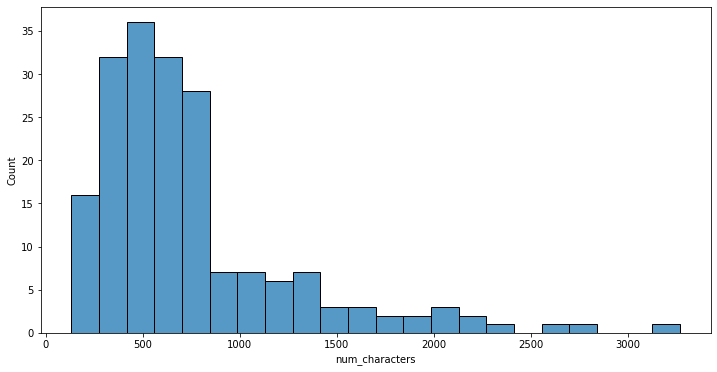

In [ ]:
# Plotting histogram for number of characters
plt.figure(figsize = (12,6))
sns.histplot(data['num_characters'])
plt.show()

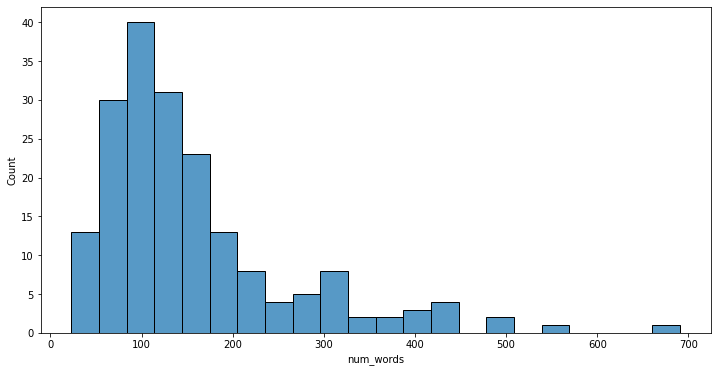

In [ ]:
# Plotting histogram for number of words
plt.figure(figsize = (12,6))
sns.histplot(data['num_words'])
plt.show()

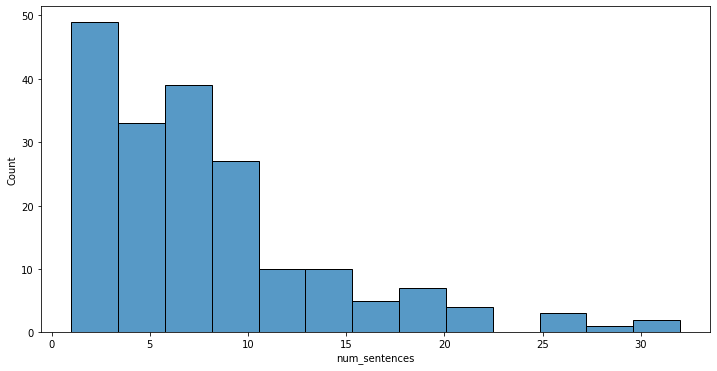

In [ ]:
# Plotting histogram for number of sentences
plt.figure(figsize = (12,6))
sns.histplot(data['num_sentences'])
plt.show()

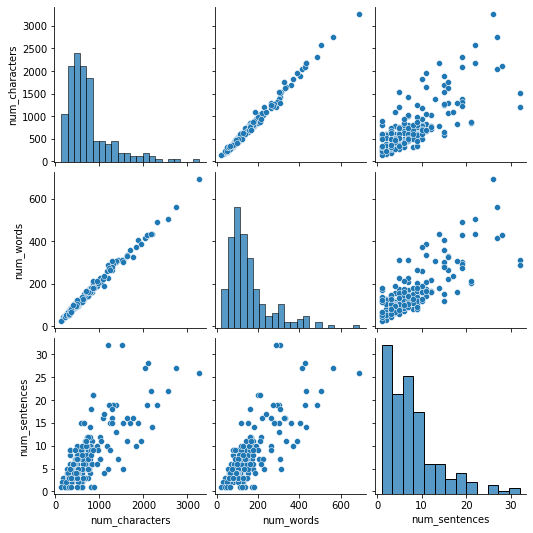

In [ ]:
# Plotting pairplot for the numerical data
sns.pairplot(data)
plt.show()

In [ ]:
# Displaying the correlation matrix
data.corr()

,num_characters,num_words,num_sentences
num_characters,1.000000,0.994895,0.762247
num_words,0.994895,1.000000,0.783983
num_sentences,0.762247,0.783983,1.000000


We can clearly see that there is a strong correlation between number of characters and number of words

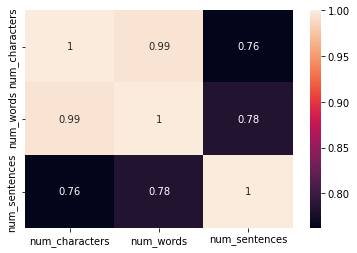

In [ ]:
# Displaying the heatmap
sns.heatmap(data.corr(), annot=True)
plt.show()

In [ ]:
# After performing the analysis we drop the columns
data.drop(columns=['num_characters','num_words','num_sentences'], inplace=True)
data

,Country,Alpha-3,Anthem
0,Albania,ALB,"Around our flag we stand united, With one wish..."
1,Armenia,ARM,"Our Fatherland, free, independent, That has fo..."
2,Austria,AUT,"Land of mountains, land by the river, Land of ..."
3,Azerbaijan,AZE,"Azerbaijan, Azerbaijan! The glorious Fatherlan..."
4,Belarus,BLR,"We, Belarusians, are peaceful people, Wholehea..."
...,...,...,...
185,Tunisia,TUN,O defenders of the Homeland! Rally around to t...
186,Uganda,UGA,"Oh Uganda! May God uphold Thee, We lay our fut..."
187,Western Sahara,ESH,"O sons of the Sahara! In the battlefield, you ..."
188,Zambia,ZMB,"Stand and sing of Zambia, proud and free, Land..."


## Data Preprocessing
We perform preprocessing to remove unwanted data and also perform stemming to convert the language into a string of processed words. 

In [ ]:
# Corpus Processing
import re
import nltk.corpus
from unidecode import unidecode
from nltk.tokenize import word_tokenize
from nltk import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize


In [ ]:
# Function that removes a list of words (ie. stopwords) from a tokenized list.
def removeWords(listOfTokens, listOfWords):
    return [token for token in listOfTokens if token not in listOfWords]

# Function that applies stemming to a list of tokenized words
def applyStemming(listOfTokens, stemmer):
    return [stemmer.stem(token) for token in listOfTokens]

# Function that removes any words composed of less than 2 or more than 21 letters
def twoLetters(listOfTokens):
    twoLetterWord = []
    for token in listOfTokens:
        if len(token) <= 2 or len(token) >= 21:
            twoLetterWord.append(token)
    return twoLetterWord

In [ ]:
# Function that performs preprocessing 
def preprocessText(corpus):
    corpus = list(corpus) 
    stopWords = stopwords.words('english')
    stemmer = SnowballStemmer('english')
    countries_list = [line.rstrip('\n') for line in open('countries.txt')] # Load .txt file line by line
    nationalities_list = [line.rstrip('\n') for line in open('nationalities.txt')] # Load .txt file line by line
    other_words = [line.rstrip('\n') for line in open('stopwords_scrapmaker.txt')] # Load .txt file line by line
    
    for document in corpus:
        index = corpus.index(document)

        # Replaces the ASCII '�' symbol with '8'
        corpus[index] = corpus[index].replace(u'\ufffd', '8')

        # Removes commas   
        corpus[index] = corpus[index].replace(',', '')

        # Removes line breaks          
        corpus[index] = corpus[index].rstrip('\n')

        # Makes all letters lowercase              
        corpus[index] = corpus[index].casefold()                
        
        # removes specials characters and leaves only words
        corpus[index] = re.sub('\W_',' ', corpus[index])

        # removes numbers and words concatenated with numbers.         
        corpus[index] = re.sub("\S*\d\S*"," ", corpus[index])

        # removes emails and mentions (words with @)
        corpus[index] = re.sub("\S*@\S*\s?"," ", corpus[index])

        # removes URLs with http 
        corpus[index] = re.sub(r'http\S+', '', corpus[index])

        # removes URLs with www   
        corpus[index] = re.sub(r'www\S+', '', corpus[index])    

        listOfTokens = word_tokenize(corpus[index])
        twoLetterWord = twoLetters(listOfTokens)

        listOfTokens = removeWords(listOfTokens, stopWords)
        listOfTokens = removeWords(listOfTokens, twoLetterWord)
        listOfTokens = removeWords(listOfTokens, countries_list)
        listOfTokens = removeWords(listOfTokens, nationalities_list)
        listOfTokens = removeWords(listOfTokens, other_words)
        
        listOfTokens = applyStemming(listOfTokens, stemmer)
        listOfTokens = removeWords(listOfTokens, other_words)

        corpus[index]   = " ".join(listOfTokens)
        corpus[index] = unidecode(corpus[index])

    return corpus

In [ ]:
# Displaying the unprocessed data element 
data['Anthem'][97]

"Thou art the ruler of the minds of all people, Dispenser of India's destiny. Thy name rouses the hearts of Punjab, Sindh,  Gujarat and Maratha, Of the Dravida and Odisha and Bengal; It echoes in the hills of Vindhya and the Himalayas, Mingles in the music of Ganga and Yamuna and is chanted by The waves of the Indian sea. They pray for thy blessings and sing thy praise. The saving of all people waits in thy hand, Thou dispenser of India's destiny. Victory, victory, victory to thee"

In [ ]:
# Displaying the processed data element
corpus = preprocessText(data['Anthem'])
corpus[97]

'art ruler mind peopl dispens destini rous heart punjab sindh gujarat maratha dravida odisha bengal echo hill vindhya himalaya mingl music ganga yamuna chant wave sea pray bless sing prais save peopl wait hand dispens destini victori victori victori'

In [ ]:
# Inserting the corpus into the Dataset
data.insert(2,'Preprocessed_Anthem',corpus,True)
data

,Country,Alpha-3,Preprocessed_Anthem,Anthem
0,Albania,ALB,flag stand unit goal sacr oath bestow proclaim...,"Around our flag we stand united, With one wish..."
1,Armenia,ARM,fatherland free independ centuri live summon s...,"Our Fatherland, free, independent, That has fo..."
2,Austria,AUT,land mountain land river land field land cathe...,"Land of mountains, land by the river, Land of ..."
3,Azerbaijan,AZE,glorious fatherland valor father stand readi d...,"Azerbaijan, Azerbaijan! The glorious Fatherlan..."
4,Belarus,BLR,belarusian peac peopl wholeheart devot motherl...,"We, Belarusians, are peaceful people, Wholehea..."
...,...,...,...,...
185,Tunisia,TUN,defend homeland ralli glori time blood surg ve...,O defenders of the Homeland! Rally around to t...
186,Uganda,UGA,god uphold lay futur hand unit free liberti ll...,"Oh Uganda! May God uphold Thee, We lay our fut..."
187,Western Sahara,ESH,son sahara battlefield torch holder long road ...,"O sons of the Sahara! In the battlefield, you ..."
188,Zambia,ZMB,stand sing proud free land work joy uniti vict...,"Stand and sing of Zambia, proud and free, Land..."


It can be noted that term frequency–inverse document frequency(TFIDF) best suites our requirement and it vectorizes the words based on its weight in the National Anthem

In [ ]:
# Vectorizing the corpus on the basis of TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['Preprocessed_Anthem'])
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names_out())

tfidf_data = pd.concat([data['Country'], tf_idf], axis=1, join='inner')
tfidf_data

,Country,abandon,abanyarwanda,abid,ablaz,abound,absolut,abstain,abund,abyss,...,yonder,yore,young,youth,zambezi,zeal,zealand,zealous,zenith,zion
0,Albania,0.000000,0.0,0.0,0.0,0.000000,0.0,0.173231,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
1,Armenia,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
2,Austria,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
3,Azerbaijan,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.095461,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
4,Belarus,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,Tunisia,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.133638,0.00000,0.0,0.0,0.0,0.0,0.0
186,Uganda,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
187,Western Sahara,0.102768,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
188,Zambia,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Function to compare k means with different number of clusters.
def KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k, init = 'k-means++', n_init = 10, tol = 0.0001, random_state = 1, algorithm = 'full')
        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

In [ ]:
import matplotlib.cm

# Function to display the dictionary
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys()):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))

# Function to display the Silhouette Plots        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") 

    # Clear the yaxis labels / ticks
    ax1.set_yticks([])  
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) 
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = matplotlib.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot. 10 for the 0 samples
        y_lower = y_upper + 10

    plt.show()
    
# Function to calculate the Silhouette Score         
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) 
        # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): 
          plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

    printAvg(avg_dict)      

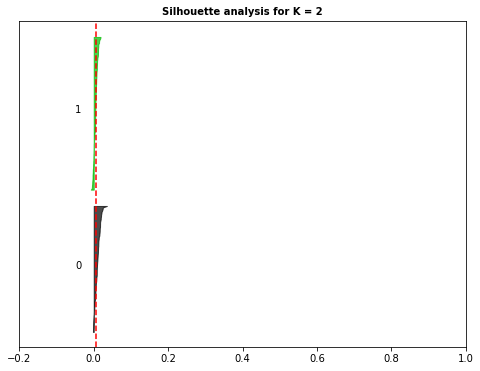

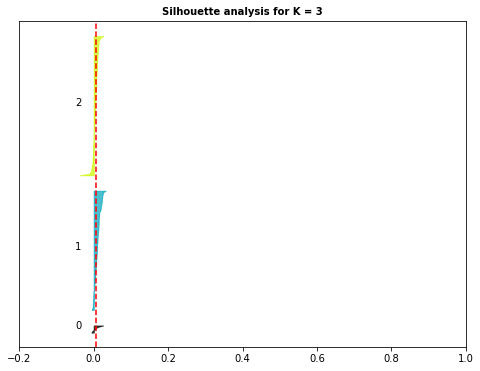

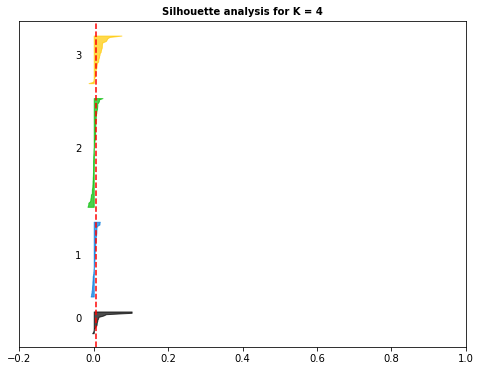

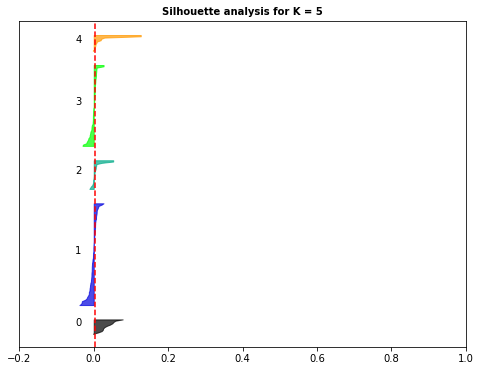

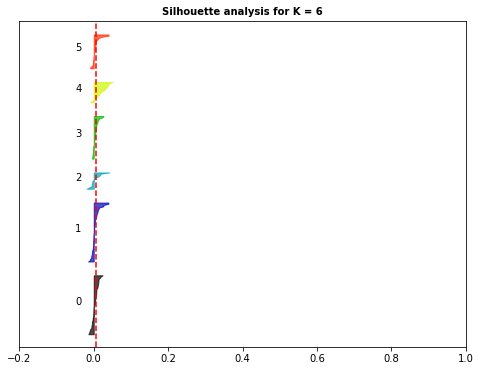

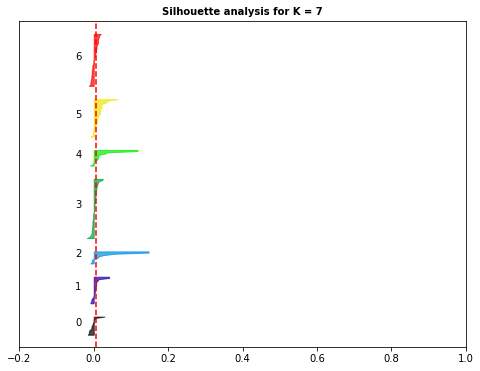

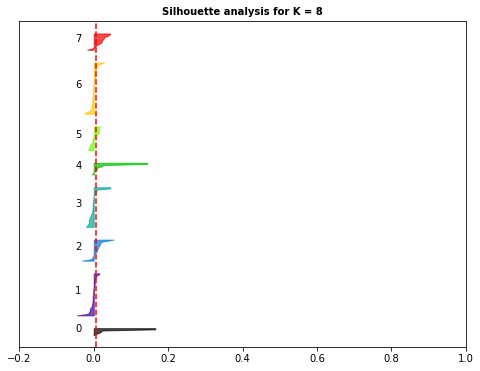

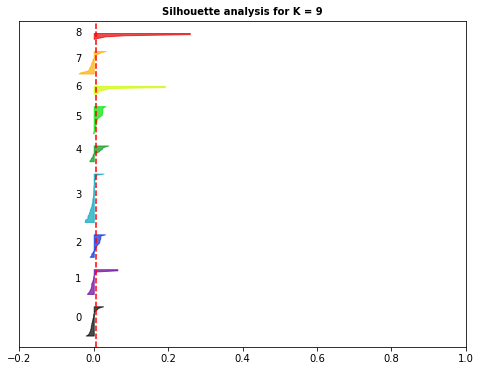

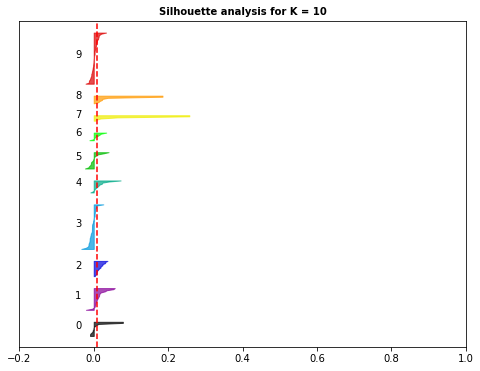

Avg: 0.003	K:5
Avg: 0.0049	K:6
Avg: 0.0053	K:4
Avg: 0.0054	K:8
Avg: 0.0061	K:3
Avg: 0.0063	K:2
Avg: 0.0069	K:9
Avg: 0.0072	K:7
Avg: 0.01	K:10


In [ ]:
# Running Kmeans
k = 10
kmeans_results = KMeans(k, tf_idf.values)

# Plotting Silhouette Analysis
silhouette(kmeans_results, tf_idf, plot=True)

It can be noted from the Silhouette Analysis, that the model works best when k = 5

In [ ]:
# Function to get the Top Features of the cluster  
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names_out()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['words', 'score'])
        dfs.append(df)
    return dfs


In [ ]:
# Function to plot the Words
def plotWords(dfs, n_feats):
    for i in range(0, len(dfs)):
        plt.figure(figsize=(14, 6))
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'words', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

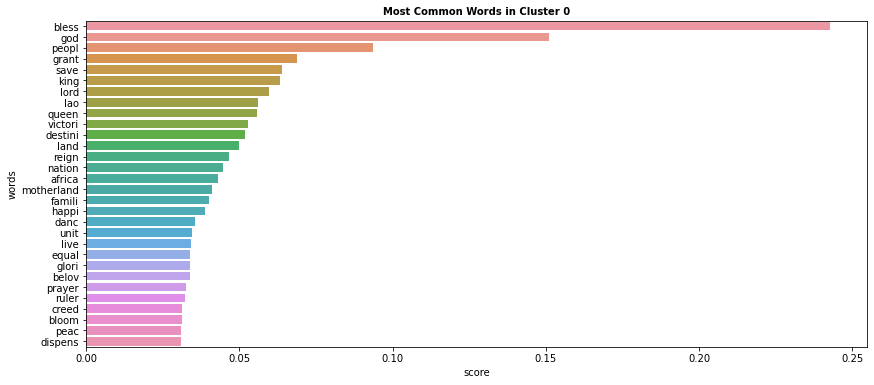

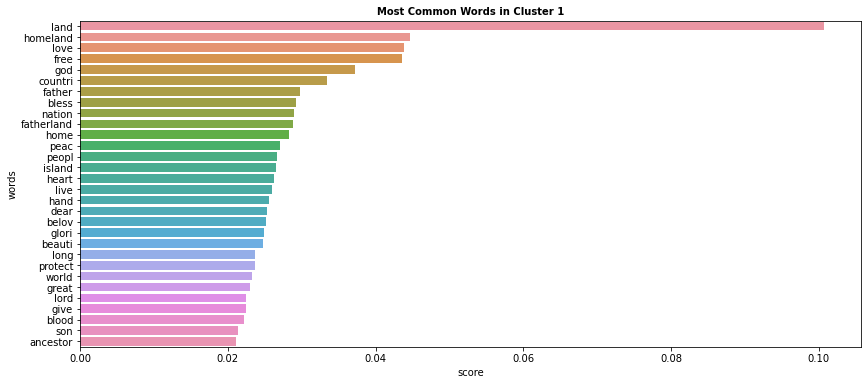

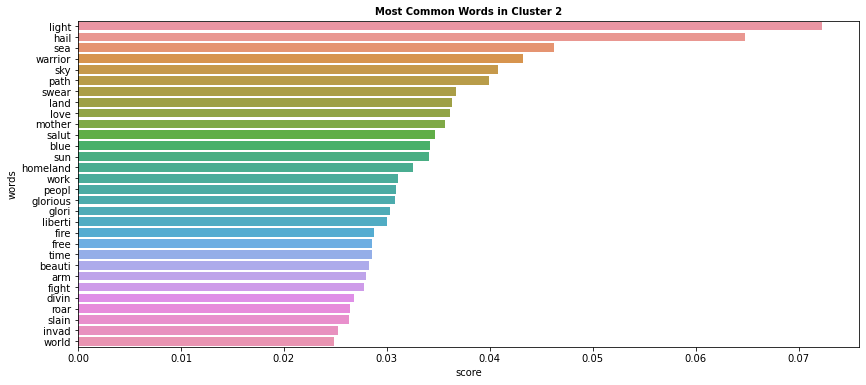

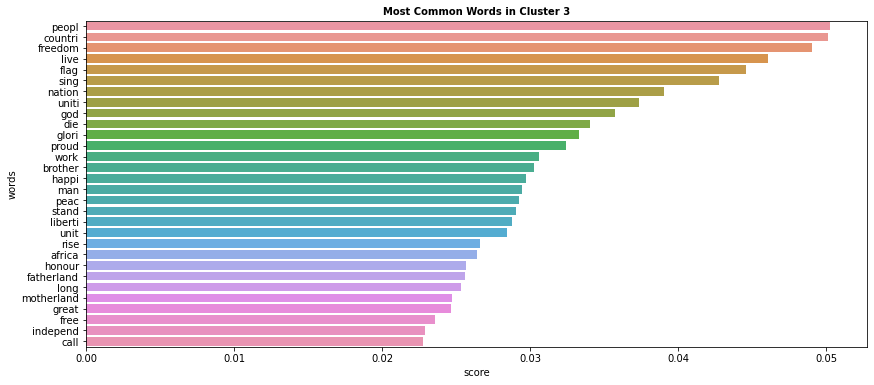

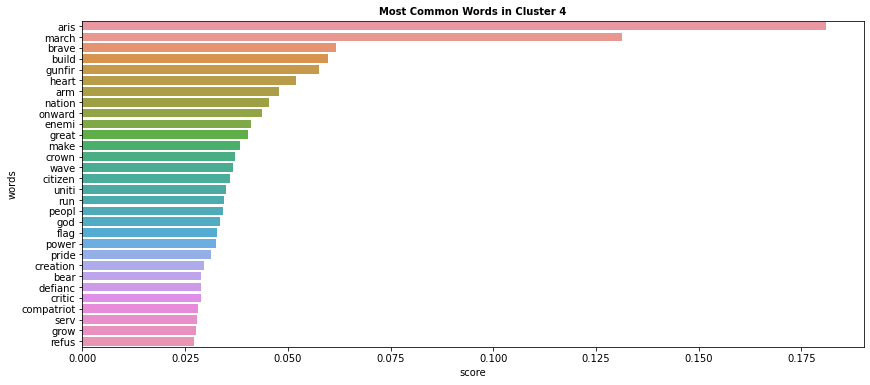

In [ ]:
# Plotting the top words in each cluster
best_result = 5
kmeans = kmeans_results.get(best_result)

tf_idf_array = tf_idf.to_numpy()
prediction = kmeans.predict(tf_idf.values)
n_feats = 30
dfs = get_top_features_cluster(tf_idf_array, prediction, n_feats)
plotWords(dfs, n_feats)

In [ ]:
# Function to compare k medoid with different number of clusters.
def KMedoid(max_k, data):
    max_k += 1
    kmedoid_results = dict()
    for k in range(2 , max_k):
        kmedoids = KMedoids(n_clusters = k, metric='euclidean', method='alternate', init = 'heuristic', max_iter=300, random_state = 1)
        kmedoid_results.update( {k : kmedoids.fit(data)} )
        
    return kmedoid_results

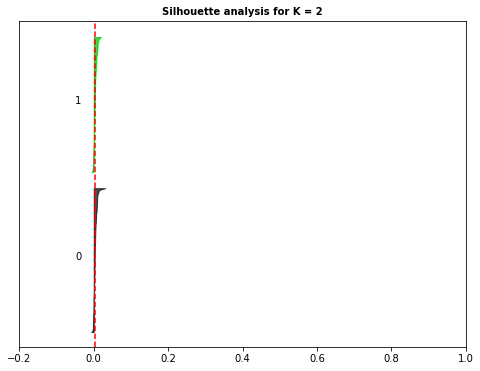

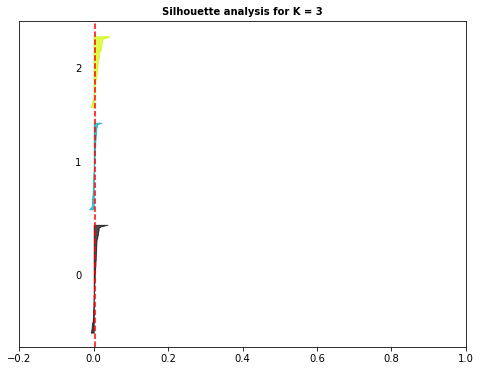

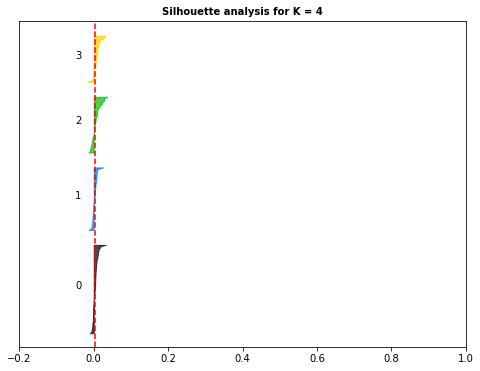

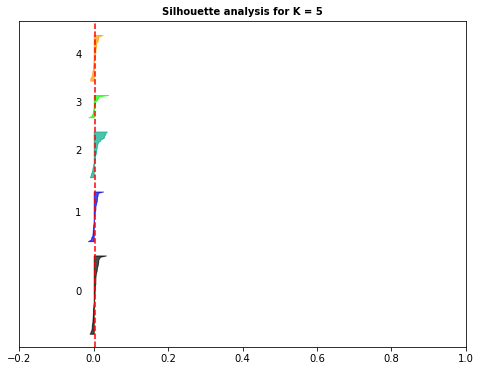

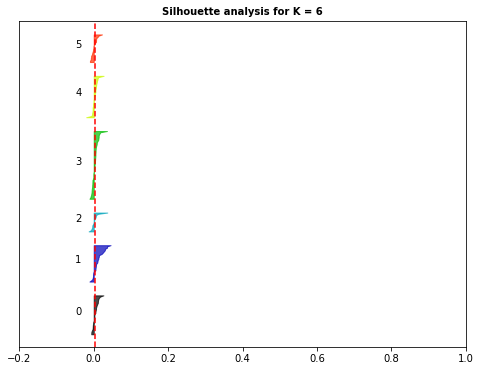

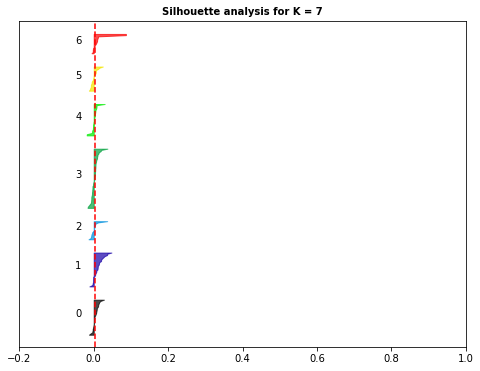

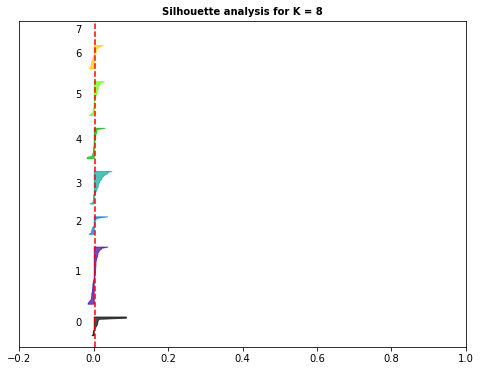

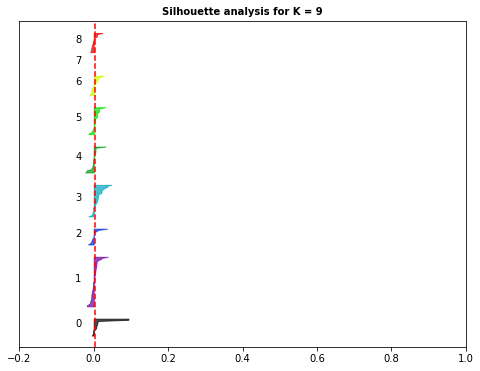

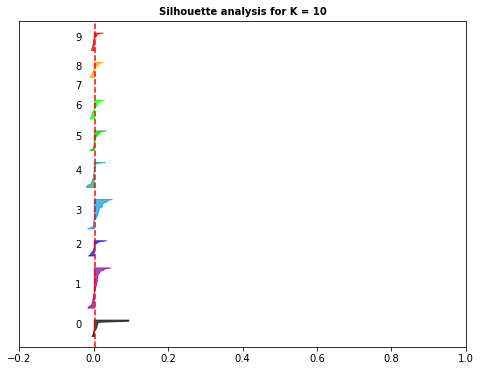

Avg: 0.0033	K:2
Avg: 0.0033	K:5
Avg: 0.0036	K:9
Avg: 0.0038	K:6
Avg: 0.004	K:4
Avg: 0.0041	K:3
Avg: 0.0042	K:8
Avg: 0.0042	K:10


In [ ]:
# Running Kmedoid
k = 10
kmedoid_results = KMedoid(k, tf_idf.values)

# Plotting Silhouette Analysis
silhouette(kmedoid_results, tf_idf, plot=True)

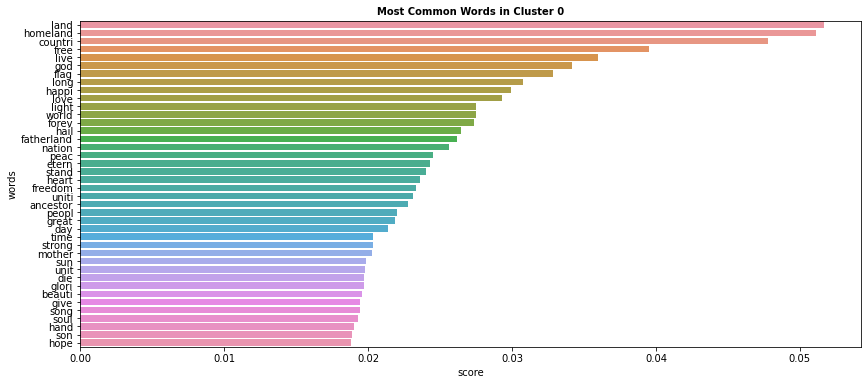

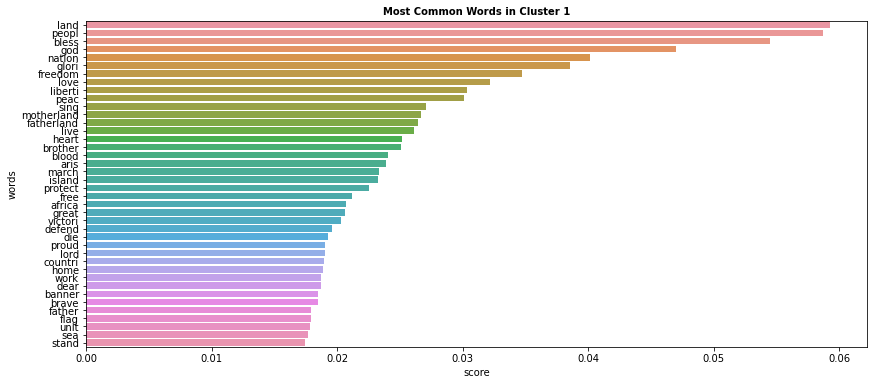

In [ ]:
# Plotting the top words in each cluster
best_result = 2
kmedoid_results = KMedoid(k, tf_idf.values)
kmedoid = kmedoid_results.get(best_result)

tf_idf_array = tf_idf.to_numpy()
prediction = kmedoid.predict(tf_idf.values)
n_feats = 40
dfs = get_top_features_cluster(tf_idf_array, prediction, n_feats)
plotWords(dfs, n_feats)

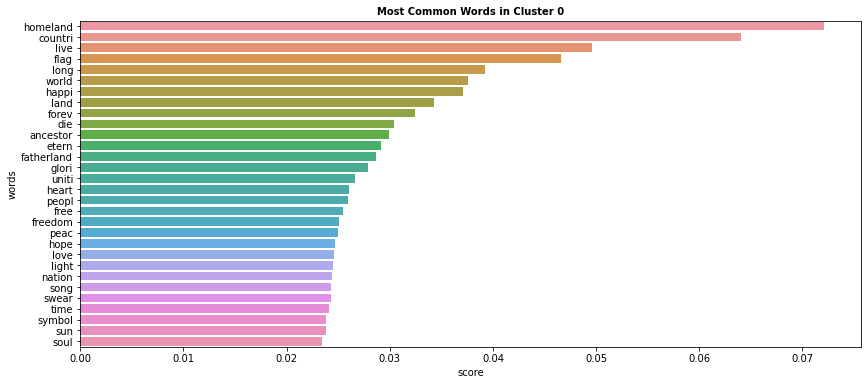

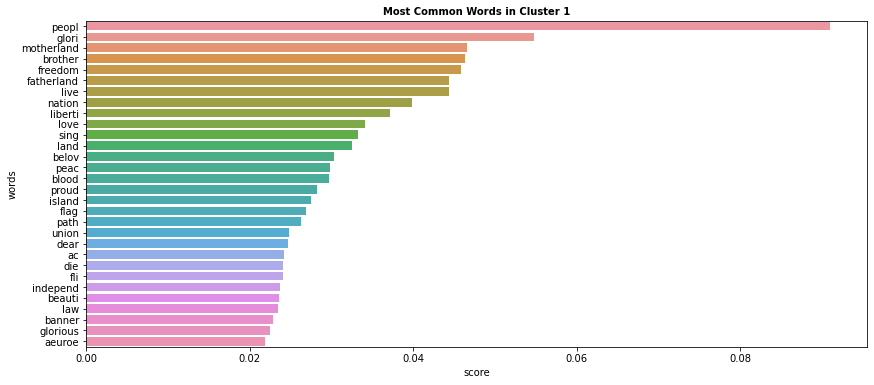

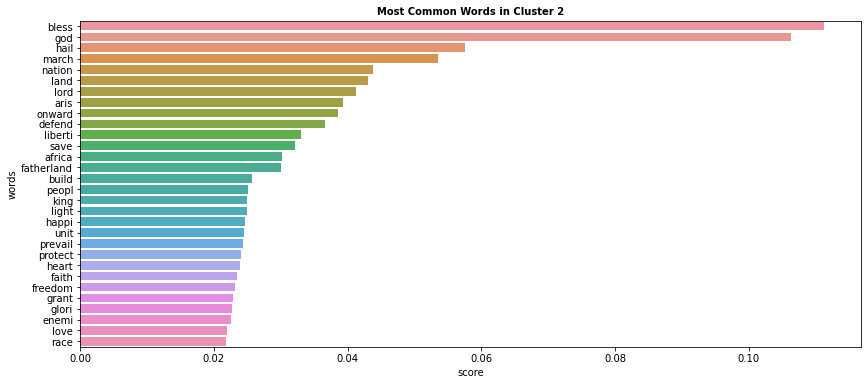

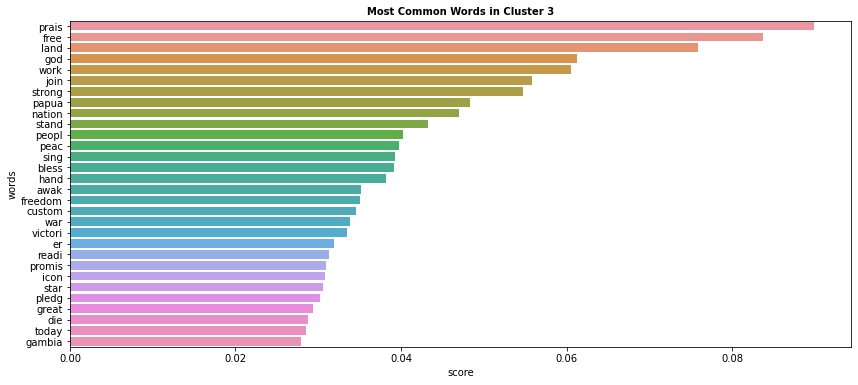

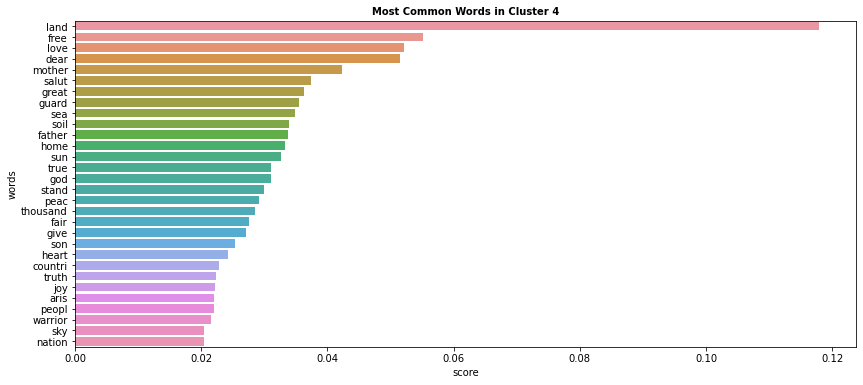

In [ ]:
# Plotting the top words in each cluster
best_result = 5
kmedoid_results = KMedoid(k, tf_idf.values)
kmedoid = kmedoid_results.get(best_result)

tf_idf_array = tf_idf.to_numpy()
prediction = kmedoid.predict(tf_idf.values)
n_feats = 30
dfs = get_top_features_cluster(tf_idf_array, prediction, n_feats)
plotWords(dfs, n_feats)

We can clearly see that the accuracy of K-Means is better than K-Mediods.  

In [ ]:
# Function to Transform the commonwords dataframe into a dictionary to be used on a WordCloud.
def commonwordsDict(commonwords, index):
    a = commonwords.T[index].sort_values(ascending = False).reset_index().values
    commonwords_dict = dict()

    for i in range(0, len(a)):
        commonwords_dict.update( {a[i,0] : a[i,1]} )

    return commonwords_dict

def generateWordClouds(commonwords):
    wordcloud = WordCloud(min_font_size=10, background_color = 'white')
    for i in range(0, len(commonwords)):
        commonwords_dict = commonwordsDict(commonwords, i)        
        wordcloud.generate_from_frequencies(commonwords_dict)
        print("\n")
        plt.figure(figsize = (10,6))
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

In [ ]:
commonwords = pd.DataFrame(kmeans.cluster_centers_)
commonwords.columns = tf_idf.columns
commonwords


,abandon,abanyarwanda,abid,ablaz,abound,absolut,abstain,abund,abyss,ac,...,yonder,yore,young,youth,zambezi,zeal,zealand,zealous,zenith,zion
0,4.336809e-19,2.168404e-19,0.000000e+00,1.084202e-19,4.336809e-19,-2.168404e-19,0.000000e+00,4.336809e-19,5.421011e-20,8.673617e-19,...,0.000000e+00,2.168404e-19,-8.673617e-19,4.336809e-19,1.084202e-19,-4.336809e-19,0.000000e+00,2.168404e-19,0.000000e+00,8.673617e-19
1,1.151112e-03,6.505213e-19,3.446760e-03,9.417943e-04,3.593423e-03,2.825383e-03,1.734723e-18,-2.168404e-18,1.061750e-03,5.477644e-03,...,-4.336809e-19,2.097893e-03,4.634624e-03,4.196829e-03,2.095319e-03,3.499006e-03,5.630052e-03,1.202786e-03,0.000000e+00,6.805303e-03
2,4.468195e-03,1.084202e-19,-8.673617e-19,0.000000e+00,2.168404e-19,-2.168404e-19,0.000000e+00,-1.301043e-18,-5.421011e-20,2.217774e-02,...,2.168404e-19,1.084202e-19,-1.734723e-18,0.000000e+00,1.084202e-19,-4.336809e-19,1.301043e-18,1.084202e-19,0.000000e+00,8.673617e-19
3,2.168404e-19,2.205694e-03,-1.301043e-18,2.168404e-19,-1.517883e-18,1.517883e-18,2.749692e-03,7.028274e-03,-3.252607e-19,-1.734723e-18,...,1.175273e-03,-4.336809e-19,8.336287e-03,2.094968e-03,1.517883e-18,2.602085e-18,4.336809e-19,-6.505213e-19,5.986070e-03,-3.035766e-18
4,2.168404e-19,1.084202e-19,-2.168404e-19,5.421011e-20,2.168404e-19,-4.336809e-19,-1.084202e-19,0.000000e+00,5.421011e-20,0.000000e+00,...,0.000000e+00,2.168404e-19,1.247104e-02,1.293466e-02,0.000000e+00,9.473707e-03,-4.336809e-19,1.084202e-19,-4.336809e-19,4.336809e-19


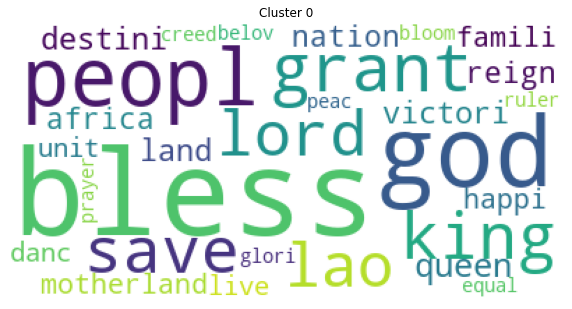

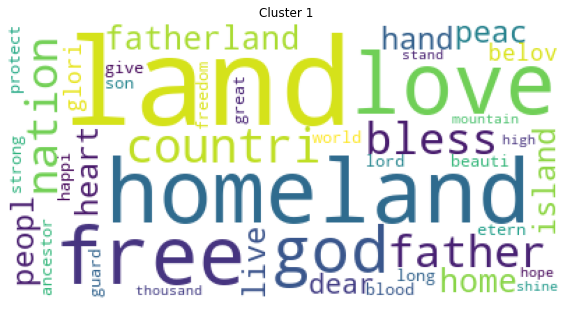

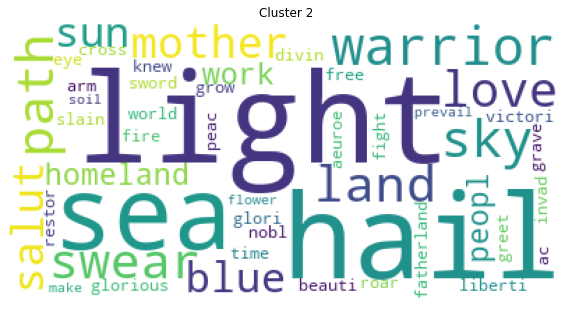

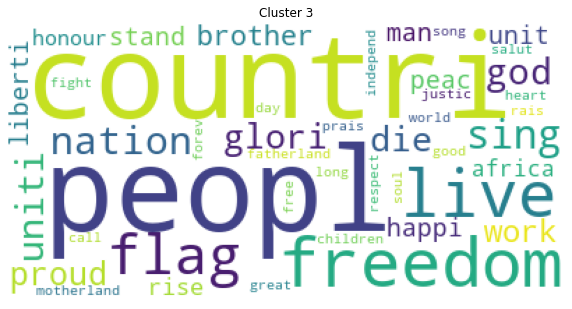

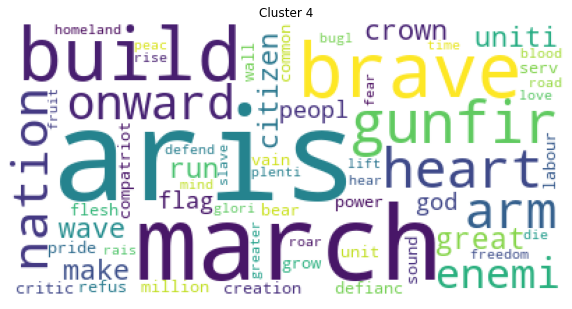

In [ ]:
# Displaying the word cloud
generateWordClouds(commonwords)

In [ ]:
# Assigning the cluster labels to each country
labels = kmeans.labels_ 
data['Label'] = labels
data.head(15)

,Country,Alpha-3,Preprocessed_Anthem,Anthem,Label
0,Albania,ALB,flag stand unit goal sacr oath bestow proclaim...,"Around our flag we stand united, With one wish...",3
1,Armenia,ARM,fatherland free independ centuri live summon s...,"Our Fatherland, free, independent, That has fo...",3
2,Austria,AUT,land mountain land river land field land cathe...,"Land of mountains, land by the river, Land of ...",1
3,Azerbaijan,AZE,glorious fatherland valor father stand readi d...,"Azerbaijan, Azerbaijan! The glorious Fatherlan...",3
4,Belarus,BLR,belarusian peac peopl wholeheart devot motherl...,"We, Belarusians, are peaceful people, Wholehea...",0
5,Belgium,BEL,"dear holi land father aC/a,!aEURoe soul heart ...","O dear Belgium, O holy land of the fathers Ã¢â...",1
6,Bosnia and Herzegovina,BIH,light soul etern fire flame mother land bosnia...,You're the light of the soul Eternal fire's fl...,1
7,Bulgaria,BGR,proud balkan mountain danub sparkl sun shine t...,"Proud Balkan Mountains, next to it the Danube ...",3
8,Croatia,HRV,beauti homeland fearless gracious father ancie...,"Our beautiful homeland, Oh so fearless and gra...",1
9,Cyprus,CYP,knew divin restor light thine eye light sword ...,"We knew thee of old, O, divinely restored, By ...",2


In [ ]:
# Map Visualization
import folium
import branca.colormap as cm
from branca.element import Figure

In [ ]:
# Function to get the theme for the national anthem
def getTheme(data):
  lst=[]
  for i in range(len(data)):
    if data[i] == 0:
      lst.append('Prayer')
    elif  data[i] == 1:
      lst.append('Fatherly Patroitic')
    elif  data[i] == 2:
      lst.append('Motherly Nature')
    elif  data[i] == 3:
      lst.append('Patroitic')
    elif  data[i] == 4:
      lst.append('Military')  
  return lst       

In [ ]:
# Loading countries polygons
geo_path = 'world-countries.json'
country_geo = json.load(open(geo_path))
gpf = gpd.read_file(geo_path)

# Merging on the alpha-3 country codes
merge = pd.merge(gpf, data, left_on='id', right_on='Alpha-3')
data_to_plot = merge[["id", "name", "Label", "geometry"]]

data_to_plot

,id,name,Label,geometry
0,AFG,Afghanistan,1,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,AGO,Angola,3,"MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6..."
2,ALB,Albania,3,"POLYGON ((20.59025 41.85540, 20.46317 41.51509..."
3,ARE,United Arab Emirates,3,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
4,ARG,Argentina,3,"MULTIPOLYGON (((-65.50000 -55.20000, -66.45000..."
...,...,...,...,...
161,PSE,West Bank,2,"POLYGON ((35.54566 32.39399, 35.54525 31.78251..."
162,YEM,Yemen,1,"POLYGON ((53.10857 16.65105, 52.38521 16.38241..."
163,ZAF,South Africa,1,"POLYGON ((31.52100 -29.25739, 31.32556 -29.401..."
164,ZMB,Zambia,3,"POLYGON ((32.75937 -9.23060, 33.23139 -9.67672..."


In [ ]:
data_to_plot.insert(4,'National Anthem Theme',getTheme(data_to_plot['Label']),True)
data_to_plot

,id,name,Label,geometry,National Anthem Theme
0,AFG,Afghanistan,1,"POLYGON ((61.21082 35.65007, 62.23065 35.27066...",Fatherly Patroitic
1,AGO,Angola,3,"MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6...",Patroitic
2,ALB,Albania,3,"POLYGON ((20.59025 41.85540, 20.46317 41.51509...",Patroitic
3,ARE,United Arab Emirates,3,"POLYGON ((51.57952 24.24550, 51.75744 24.29407...",Patroitic
4,ARG,Argentina,3,"MULTIPOLYGON (((-65.50000 -55.20000, -66.45000...",Patroitic
...,...,...,...,...,...
161,PSE,West Bank,2,"POLYGON ((35.54566 32.39399, 35.54525 31.78251...",Motherly Nature
162,YEM,Yemen,1,"POLYGON ((53.10857 16.65105, 52.38521 16.38241...",Fatherly Patroitic
163,ZAF,South Africa,1,"POLYGON ((31.52100 -29.25739, 31.32556 -29.401...",Fatherly Patroitic
164,ZMB,Zambia,3,"POLYGON ((32.75937 -9.23060, 33.23139 -9.67672...",Patroitic


In [ ]:
data_to_plot['name'][data_to_plot['National Anthem Theme']=='Prayer']

17                         Belarus
50                            Fiji
53                  United Kingdom
69                           India
85                            Laos
93                          Latvia
106                       Malaysia
142                      Swaziland
149            Trinidad and Tobago
152    United Republic of Tanzania
Name: name, dtype: object

In [ ]:
len(data_to_plot['name'][data_to_plot['National Anthem Theme']=='Prayer'])

10

In [ ]:
data_to_plot['name'][data_to_plot['National Anthem Theme']=='Fatherly Patroitic']

0                 Afghanistan
6                   Australia
7                     Austria
10                    Belgium
16     Bosnia and Herzegovina
                ...          
157                Uzbekistan
160                   Vanuatu
162                     Yemen
163              South Africa
165                  Zimbabwe
Name: name, Length: 73, dtype: object

In [ ]:
len(data_to_plot['name'][data_to_plot['National Anthem Theme']=='Fatherly Patroitic'])

73

In [ ]:
data_to_plot['name'][data_to_plot['National Anthem Theme']=='Motherly Nature']

13             Bangladesh
27                  Chile
33               Colombia
34             Costa Rica
36                 Cyprus
40                Denmark
41     Dominican Republic
60                 Greece
64               Honduras
78                  Japan
89              Sri Lanka
91              Lithuania
94                Morocco
103            Mozambique
110             Nicaragua
117                Panama
122           Puerto Rico
124              Portugal
126                 Qatar
128                Russia
161             West Bank
Name: name, dtype: object

In [ ]:
len(data_to_plot['name'][data_to_plot['National Anthem Theme']=='Motherly Nature'])

21

In [ ]:
data_to_plot['name'][data_to_plot['National Anthem Theme']=='Patroitic']

1                                Angola
2                               Albania
3                  United Arab Emirates
4                             Argentina
5                               Armenia
8                            Azerbaijan
9                               Burundi
11                                Benin
12                         Burkina Faso
14                             Bulgaria
19                              Bolivia
24             Central African Republic
29                          Ivory Coast
31     Democratic Republic of the Congo
32                Republic of the Congo
38                              Germany
39                             Djibouti
45                              Eritrea
46                                Spain
48                             Ethiopia
52                                Gabon
54                              Georgia
55                                Ghana
56                               Guinea
57                               Gambia


In [ ]:
len(data_to_plot['name'][data_to_plot['National Anthem Theme']=='Patroitic'])

52

In [ ]:
data_to_plot['name'][data_to_plot['National Anthem Theme']=='Military']

15     The Bahamas
28           China
35            Cuba
51          France
80           Kenya
108          Niger
109        Nigeria
121         Poland
145           Togo
159        Vietnam
Name: name, dtype: object

In [ ]:
len(data_to_plot['name'][data_to_plot['National Anthem Theme']=='Military'])

10

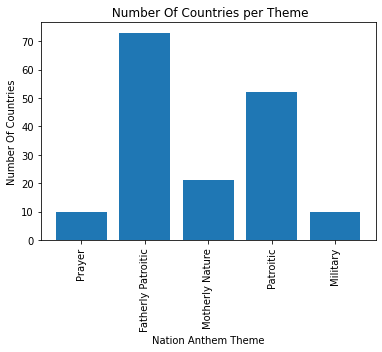

In [ ]:
x=['Prayer', 'Fatherly Patroitic', 'Motherly Nature', 'Patroitic', 'Military']
 
# giving the values against
# each value at x axis
y=[10, 73, 21, 52, 10]
plt.bar(x, y)
 
# setting x-label as pen sold
plt.xlabel("Nation Anthem Theme")
plt.xticks(rotation='vertical')
# setting y_label as price
plt.ylabel("Number Of Countries")  
plt.title(" Number Of Countries per Theme")
plt.show()

In [ ]:
# Creating a discrete color map
values = data_to_plot[['Label']].to_numpy()
color_step = cm.StepColormap(['r', 'y','g','b', 'm'], vmin=values.min(), vmax=values.max(), caption='step')
color_step

In [ ]:
def make_geojson_choropleth(display, data, colors):
    '''creates geojson choropleth map using a colormap, with tooltip for country names and groups'''
    # Dictionary of Countries IDs and Clusters
    group_dict = data.set_index('id')['Label'] 
    tooltip = folium.features.GeoJsonTooltip(["name", "Label","National Anthem Theme"], aliases=display, labels=True)
    return folium.GeoJson(data[["id", "name","Label","geometry","National Anthem Theme"]],
                          style_function = lambda feature: {
                               'fillColor': colors(group_dict[feature['properties']['id']]),
                               'color':'black',
                               'weight':0.5
                               },
                          highlight_function = lambda x: {'weight':2, 'color':'black'},
                          smooth_factor=2.0,
                          tooltip = tooltip)

# Makes map appear inline on notebook
def display(m, width, height):
    """Takes a folium instance and embed HTML."""
    fig = Figure(width=width, height=height)
    fig.add_child(m)
    return fig

In [ ]:
# Initializing our Folium Map
m = folium.Map(location=[43.5775, -10.106111], zoom_start=2.3, tiles='cartodbpositron')

# Making a choropleth map with geojson
geojson_choropleth = make_geojson_choropleth(["Country:", "Cluster ID:", "National Anthem Theme:"], data_to_plot, color_step)
geojson_choropleth.add_to(m)

width, height = 1300, 675
display(m, width, height)
